In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### This notebook is for checking whether the model 1 (1402.5993) written in CAMB is correct compared to when it was written in CLASS.

In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import camb

In [4]:
camb_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, camb_path)
print('Using CAMB %s installed at %s'%(camb.__version__, os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /usr/local/lib/python3.6/dist-packages/camb-1.3.5-py3.6.egg/camb


In [5]:
# esthetic definitions for the plots
font = {'size'   : 24, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

#### Consider Fiducial setting 
* Set Fiducial model in modified CAMB and set Fiducial model in modified CLASS
* Compare their matter power spectra
* fix units problems - set the same units in CAMB and CLASS

In [6]:
#Set up Fiducial in CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2650, lens_potential_accuracy=0)
pars.set_matter_power(redshifts=[0.,0.8], kmax = 2.0)

Note: redshifts have been re-sorted (earliest first)


class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 2.0
   k_per_logint = 0
   PK_num_redshifts = 2
   PK_redshifts = [0.8, 0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2800
 max_l_tensor = 600
 max_eta_k = 7000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.0006451383989381787
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24524332588411976
 num_nu_massless = 2.030666666666667
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0153333333333332]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nru

In [7]:
#calculate results for Fiducial in CAMB
results = camb.get_results(pars)
kh, zz, matter_power =results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200) 

In [8]:
import classy
from classy import Class

In [12]:
#for fiducial in CLASS
pars_ewcdm = {'output': 'mPk, dTk',
                'P_k_max_1/Mpc': 3.0,
                'Omega_Lambda': 0.,
                'non_linear': 'halofit',
                'modes': 's', #
                'A_s': 2e-9, #from CAMB for compare
                'n_s': 0.965, #from CAMB for compare
                'z_max_pk': '0.5',
                'Omega_cdm': 0.122/(0.675**2),
                'Omega_b': 0.022/(0.675**2),
                'background_verbose': '2',
                'H0': '67.5', #from CAMB
                'fluid_equation_of_state': 'CLP',
                'w0_fld': -0.99,
                'wa_fld': 0.,
                'e_pi': 0., #from 0.5 to 0
                'f_pi': 0., #from 8.0 to 0
                'log10ceff2': 0,#from -5.0 to 0
                'log10g_pi': 0, #from 10.0 to 0
                'use_ppf': 'no',
                'gauge': 'newtonian'}
ewcdm_fiducial = Class()
ewcdm_fiducial.set(pars_ewcdm)
ewcdm_fiducial.compute()

In [13]:
pk_ew, k, z = ewcdm_fiducial.get_pk_and_k_and_z(nonlinear=False)

In [28]:
results.Params.h

0.675

Text(0.5, 1.0, 'Fiducial')

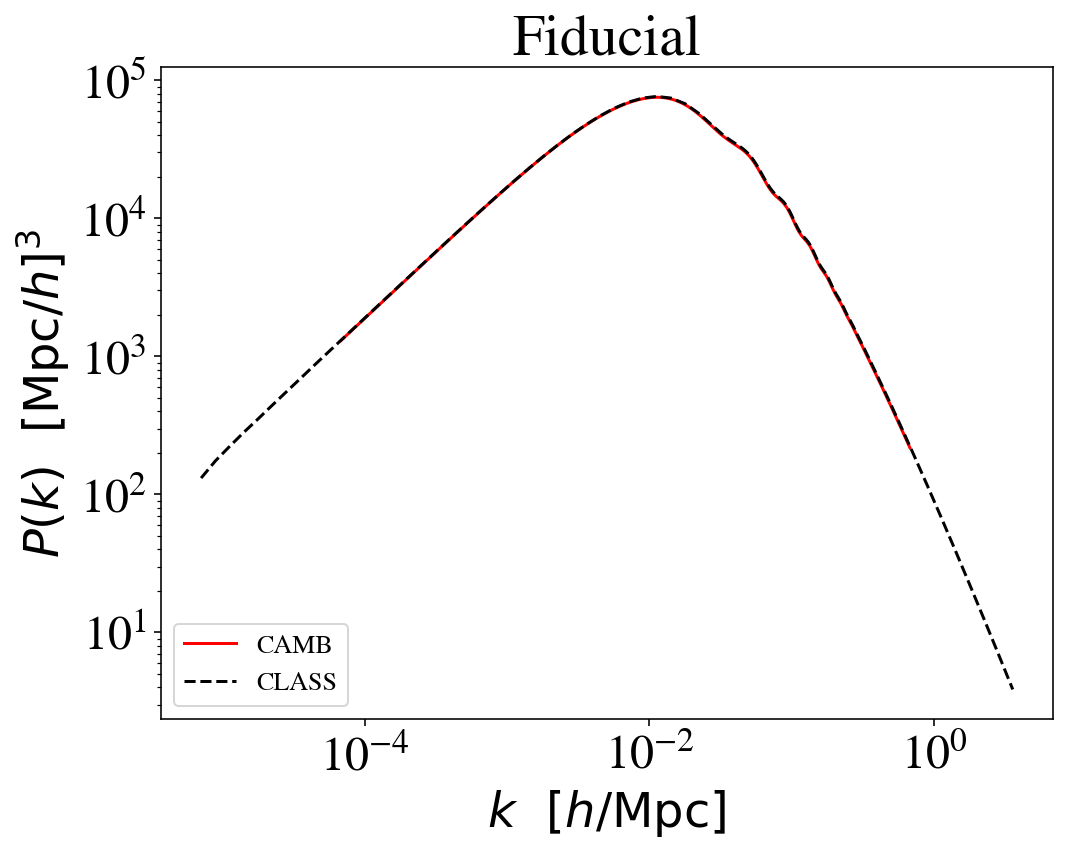

In [55]:
plt.xlabel(r'$k \ \ [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \ \ [\mathrm{Mpc}/h]^3$')

plt.loglog(kh*results.Params.h, matter_power[0,:]/(results.Params.h)**3, color = 'r')
plt.loglog(k, pk_ew[:,3],'k', ls='--')

plt.legend(['CAMB','CLASS'], loc='lower left', prop={'size':13})
plt.title('Fiducial')


#### Consider anisotropic stress with model 1
* Compare model 1 in CAMB and CLASS respectively by using matter power spectrum P(k)
* the values of parameters:
    - In CLASS, e_pi equals 0.2 which is corresponding to astress_p1 = 0.2 in CAMB
    - In model 1, we do not consider parameters f_pi, g_pi 
    - from 1402.5993, $ c_{eff}^2 \equiv c_s^2 - \frac{2f_\pi}{3}$ and we set cs2 = 1.0 in CAMB, log10ceff2 = 0 in CLASS. 

In [10]:
#test model 1 in CAMB
pars_m1=camb.read_ini(os.path.join(camb_path, 'inifiles', 'test1_fld.ini'))

In [11]:
print(pars_m1)

class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 1.3440918
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2200
 max_l_tensor = 600
 max_eta_k = 4400.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.02224054
 omch2 = 0.1199529
 omk = 0.0
 omnuh2 = 0.00064
 H0 = 67.20459
 TCMB = 2.7255
 YHe = 0.24
 num_nu_massless = 2.046
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = True
 nu_mass_degeneracies = [0.0]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_indeptilt
   ns = 0.9649041
   nrun = 0.0
   nrunrun = 0.0
   nt = 0.

In [12]:
results_m1 = camb.get_results(pars_m1)

In [13]:
print(type(results_m1))

<class 'camb.results.CAMBdata'>


In [14]:
kh_m1, z_m1, pk_m1 = results_m1.get_matter_power_spectrum(minkh=7.05428291e-06*0.6720459, maxkh=3.53915559*0.6720459, npoints = 119)
#kh, z, PK_m1 = results_m1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, k_hunit=False)

In [25]:
kh_m1, z_m1, pk_m1 = results_m1.get_matter_power_spectrum(minkh=7.05428291e-06*0.6720459, maxkh=3.53915559*0.6720459, npoints = 119)
#kh, z, PK_m1 = results_m1.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200, k_hunit=False)

In [15]:
pars_ewcdm_m1 = {'output': 'mPk, dTk',
                'P_k_max_1/Mpc': 3.0,
                'Omega_Lambda': 0.,
                'non_linear': 'halofit',
                'modes': 's', #
                'A_s': 2.2109292604755134e-9, #
                'n_s': 0.9649041, #
                'z_max_pk': '0.5',
                'Omega_cdm': 0.1199529/(0.6720459**2), # = omch2/h^2 from CAMB 
                'Omega_b': 0.02224054/(0.6720459**2),
                'background_verbose': '2',
                'H0': '67.20459', #from CAMB test1_fld.ini
                'fluid_equation_of_state': 'CLP',
                'w0_fld': -0.99,
                'wa_fld': 0.,
                'e_pi': 0.2, #from CAMB test1_fld.ini
                'f_pi': 0., #from CAMB test1_fld.ini
                'log10ceff2': 0,#from -5.0 to 0
                #'log10cs2_fld': 1,# add cs2 param corresponding to CAMB 
                #'log10g_pi': 0, #from CAMB test1_fld.ini
                'use_ppf': 'no',
                'gauge': 'newtonian'}
ewcdm_m1 = Class()
ewcdm_m1.set(pars_ewcdm_m1)
ewcdm_m1.compute()

In [16]:
pk_ew_m1, k_m1, z = ewcdm_m1.get_pk_and_k_and_z(nonlinear=False)

In [24]:
k_m1

array([7.05428291e-06, 8.88081602e-06, 1.11802850e-05, 1.40751449e-05,
       1.77195575e-05, 2.23076013e-05, 2.80836061e-05, 3.53551654e-05,
       4.45095161e-05, 5.60341609e-05, 7.05428291e-05, 8.88081602e-05,
       1.11802850e-04, 1.40751449e-04, 1.77195575e-04, 2.23076013e-04,
       2.80836061e-04, 3.53551654e-04, 4.45095161e-04, 5.60341609e-04,
       7.05428291e-04, 8.88081602e-04, 1.11802850e-03, 1.40751449e-03,
       1.77195575e-03, 2.23076013e-03, 2.80836061e-03, 3.53551654e-03,
       4.45095161e-03, 5.60341609e-03, 7.05428291e-03, 8.88081602e-03,
       1.11802850e-02, 1.40751447e-02, 1.77194739e-02, 2.22959635e-02,
       2.76942249e-02, 3.22559159e-02, 3.55623387e-02, 3.82872707e-02,
       4.07194481e-02, 4.29874307e-02, 4.51591987e-02, 4.72754855e-02,
       4.93630335e-02, 5.14406822e-02, 5.35224827e-02, 5.56194269e-02,
       5.77404730e-02, 5.98931838e-02, 6.20841428e-02, 6.43192333e-02,
       6.66038330e-02, 6.89429512e-02, 7.13413276e-02, 7.38035063e-02,
      

In [17]:
results_m1.Params.h

0.6720459

Text(0.5, 1.0, 'Model 1')

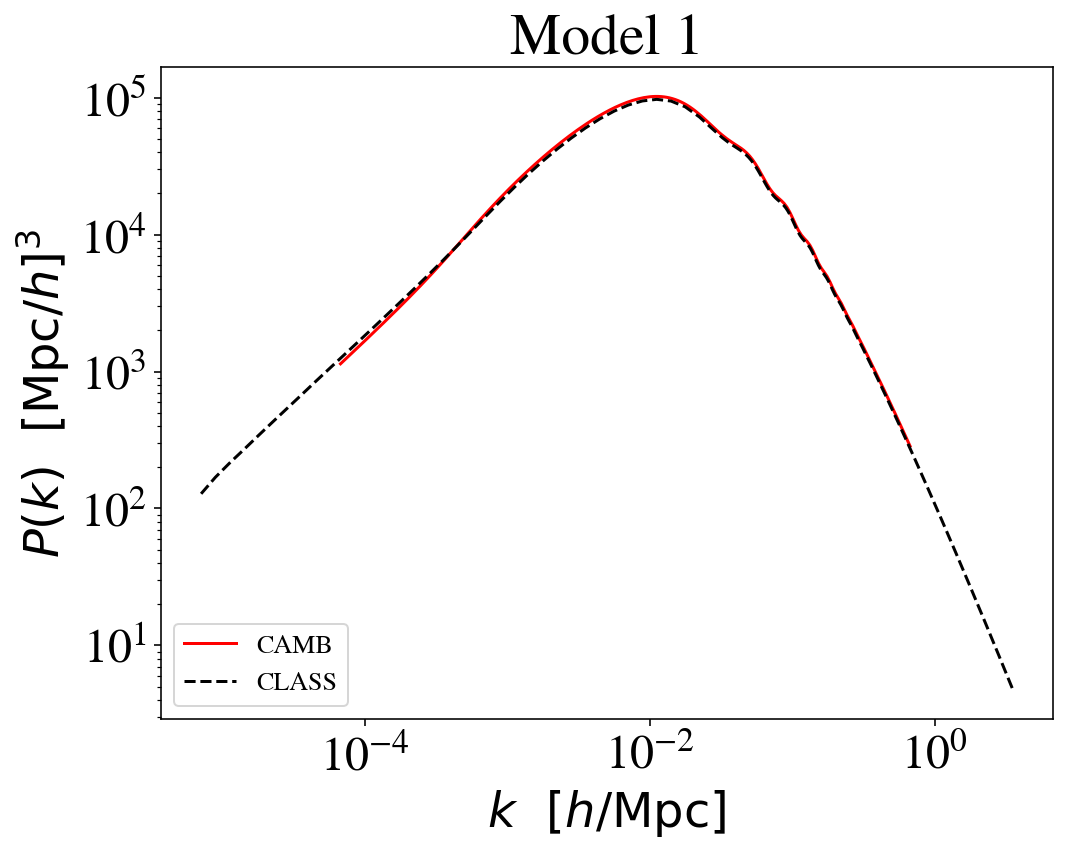

In [18]:
plt.xlabel(r'$k \ \ [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \ \ [\mathrm{Mpc}/h]^3$')

plt.loglog(kh_m1*results_m1.Params.h, pk_m1[0,:]/(results_m1.Params.h)**3, color = 'r')
plt.loglog(k_m1, pk_ew_m1[:,3],'k', ls='--')

plt.legend(['CAMB','CLASS'], loc='lower left', prop={'size':13})
plt.title('Model 1')

In [19]:
len(pk_ew_m1[:,3])

119

In [20]:
len(pk_m1[0,:])

200

In [23]:
#print(kh_m1*results_m1.Params.h)

Text(0.5, 1.0, 'Model 1')

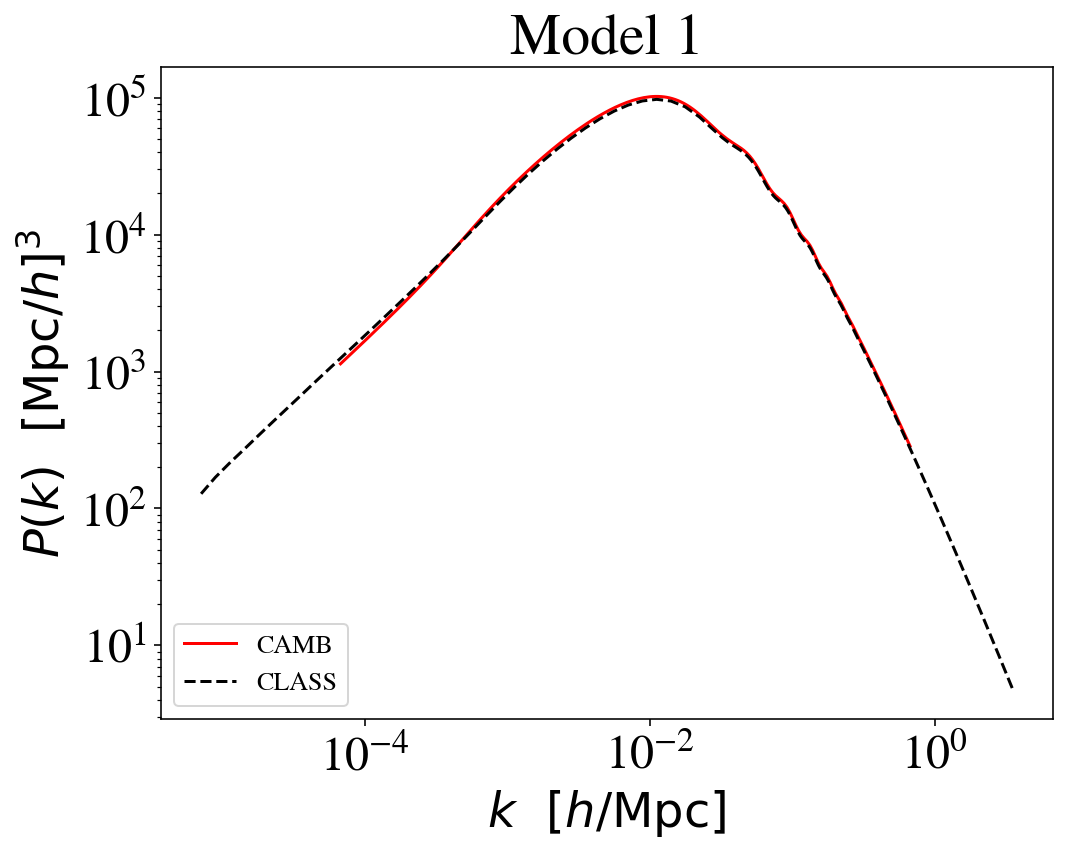

In [18]:
plt.xlabel(r'$k \ \ [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\delta P(k) \ \ [\mathrm{Mpc}/h]^3$')

plt.loglog(kh_m1*results_m1.Params.h, pk_m1[0,:]/(results_m1.Params.h)**3 - , color = 'r')
#plt.loglog(k_m1, pk_ew_m1[:,3],'k', ls='--')

plt.legend(['CAMB','CLASS'], loc='lower left', prop={'size':13})
plt.title('Model 1')